### Exploring graph fourier low pass filter... and later possibly wavelet filter

In [1]:
import sys
import os 
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from data_code.data_utils import get_pointcloud_datasets
from data_code.graph_utils import SpectralPointCloud
import yaml
from munch import Munch
from utils import plot_3d_point_clouds, get_ptcloud_img
import numpy as np 

In [2]:
config_path = '/mnt/justin/multi-scale-se3-representations/conf/data/shapenet.yaml'

with open(config_path, "r") as file:
    config_dict = yaml.safe_load(file)

cfg = Munch(config_dict)

In [3]:
pc_train_dataset, pc_val_dataset, pc_test_dataset = get_pointcloud_datasets(cfg)

[DATASET] sample out 1024 points
[DATASET] Open file /mnt/justin/multi-scale-se3-representations/data/ShapeNet55-34/ShapeNet-35/train.txt
[DATASET] 41952 instances were loaded


In [4]:
pc_train_dataset[1]

('03928116',
 'fd6034ddb67af9615b39a37797d4a0c4',
 tensor([[ 0.0029, -0.4879,  0.1759],
         [-0.7592,  0.1982, -0.5004],
         [ 0.1755,  0.4941,  0.2419],
         ...,
         [-0.0589,  0.1965,  0.4218],
         [-0.6421, -0.4665,  0.4218],
         [ 0.5321,  0.4249, -0.1053]]))

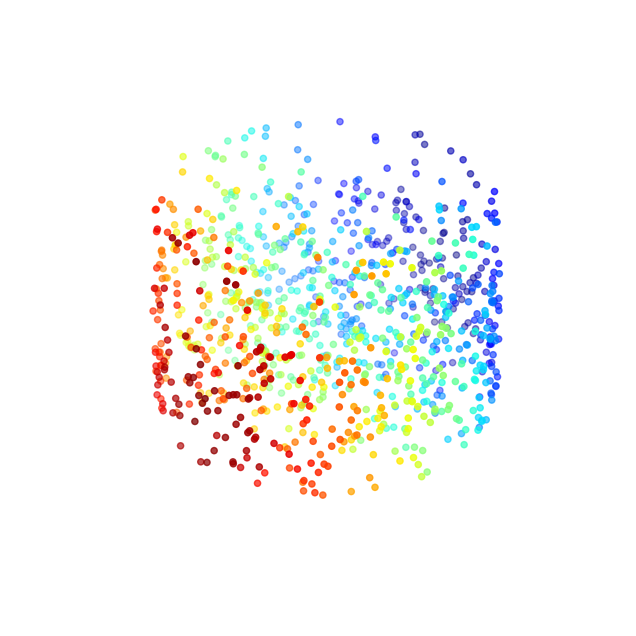

In [5]:
get_ptcloud_img(pc_train_dataset[7][2])

### quick testing our spectral point cloud

In [22]:
point_cloud = pc_train_dataset[8][2]
Spec = SpectralPointCloud(point_cloud, eps_ball=True, eps_radius=0.1, k=None)

In [23]:
# check adjancency matrix
adj = Spec.get_adjacency_matrix().toarray() # confirm that it's symmetric and no elements on diag

# check laplacian decomposition
[U, LAM, U_T] = Spec.get_laplacian_decomposition()
#assert(LAM[-1][-1] == np.max(LAM))
#assert(LAM[0][0] == np.min(LAM))
#assert(np.all(U.T == U_T))

In [24]:
np.mean(np.sum(adj, axis=1))

np.float64(7.45703125)

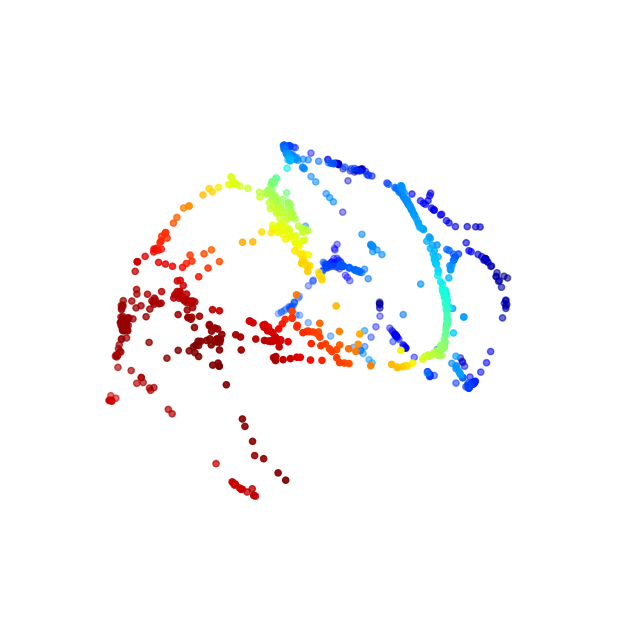

In [33]:
# check lower resolution
# expect for large thresh to recover the same point cloud 
# small thresh should be smoothed version
half_point_cloud = Spec.get_lower_resolution(20, point_cloud)
get_ptcloud_img(half_point_cloud)

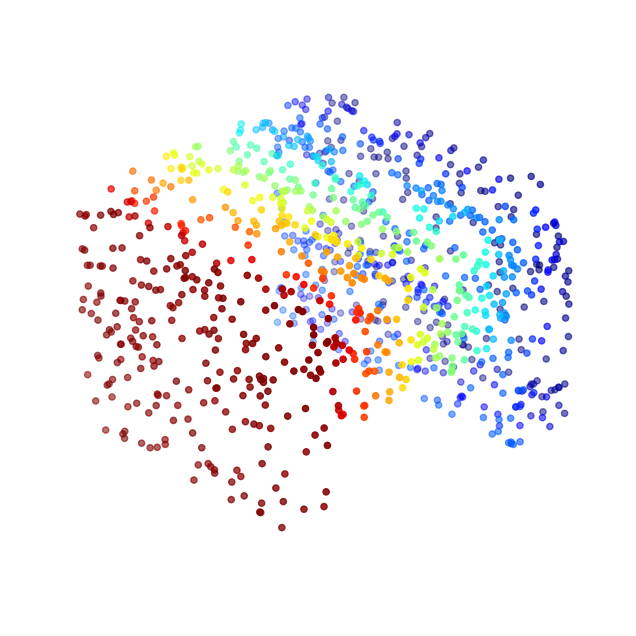

In [34]:
get_ptcloud_img(point_cloud)